Data preparation and Visualization : (Graded out of 100)
1.  You must perform appropriate EDA on your dataset, rationalizing and detailing why you chose the specific methods and what insight you gained. [0-20]

2.      You must also rationalise justify and detail all the methods used to prepare the data for ML. [0-30]
3.      Appropriate visualizations must be used to engender insight into the dataset and to illustrate your final insights gained in your analysis. [0-20]
4.      All design and implementation of your visualizations must be justified and detailed in full., making reference to Tufts Principles [0-30]


In [55]:
# Load the libraries
import numpy as np ##for working with arrays
import matplotlib.pyplot as plt ###for making visualisations
import pandas as pd  ##Data manipulation and analysis

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

# Importing the dataset

In [2]:
# Load migration data.csv file into dataframe (df)
df = pd.read_csv('Migration data.csv')

# Display first 5 records
df.head()

,STATISTIC Label,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
0,Estimated Migration (Persons in April),1987,All ages,Both sexes,Net migration,Thousand,-23.0
1,Estimated Migration (Persons in April),1987,All ages,Both sexes,Emigrants: All destinations,Thousand,40.2
2,Estimated Migration (Persons in April),1987,All ages,Both sexes,Immigrants: All origins,Thousand,17.2
3,Estimated Migration (Persons in April),1987,All ages,Male,Net migration,Thousand,NaN
4,Estimated Migration (Persons in April),1987,All ages,Male,Emigrants: All destinations,Thousand,NaN


In [3]:
df.tail(5) 

,STATISTIC Label,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
1993,Estimated Migration (Persons in April),2023,65 years and over,Male,Emigrants: All destinations,Thousand,0.4
1994,Estimated Migration (Persons in April),2023,65 years and over,Male,Immigrants: All origins,Thousand,1.5
1995,Estimated Migration (Persons in April),2023,65 years and over,Female,Net migration,Thousand,1.8
1996,Estimated Migration (Persons in April),2023,65 years and over,Female,Emigrants: All destinations,Thousand,0.6
1997,Estimated Migration (Persons in April),2023,65 years and over,Female,Immigrants: All origins,Thousand,2.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STATISTIC Label         1998 non-null   object 
 1   Year                    1998 non-null   int64  
 2   Age Group               1998 non-null   object 
 3   Sex                     1998 non-null   object 
 4   Inward or Outward Flow  1998 non-null   object 
 5   UNIT                    1998 non-null   object 
 6   VALUE                   1683 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 109.4+ KB


In [5]:
df.shape

(1998, 7)

In [6]:
df.dtypes

STATISTIC Label            object
Year                        int64
Age Group                  object
Sex                        object
Inward or Outward Flow     object
UNIT                       object
VALUE                     float64
dtype: object

In [7]:
df.describe()

,Year,VALUE
count,1998.000000,1683.000000
mean,2005.000000,10.856625
std,10.679751,17.070445
min,1987.000000,-43.900000
25%,1996.000000,1.200000
50%,2005.000000,4.500000
75%,2014.000000,14.000000
max,2023.000000,151.100000


In [8]:

dfnet = df[(df['Inward or Outward Flow'] == "Net migration")]
dfem = df[(df['Inward or Outward Flow'] == "Emigrants: All destinations")]
dfim= df[(df['Inward or Outward Flow'] == "Immigrants: All origins")]

In [9]:
dfnet.describe()

,Year,VALUE
count,666.000000,411.000000
mean,2005.000000,6.194891
std,10.685103,14.904486
min,1987.000000,-43.900000
25%,1996.000000,-0.150000
50%,2005.000000,2.100000
75%,2014.000000,9.300000
max,2023.000000,104.800000


In [10]:
dfem.describe()

,Year,VALUE
count,666.000000,636.000000
mean,2005.000000,10.382704
std,10.685103,14.101189
min,1987.000000,0.000000
25%,1996.000000,0.975000
50%,2005.000000,4.350000
75%,2014.000000,14.100000
max,2023.000000,83.000000


In [11]:
dfim.describe()

,Year,VALUE
count,666.000000,636.000000
mean,2005.000000,14.343082
std,10.685103,20.077997
min,1987.000000,0.200000
25%,1996.000000,2.400000
50%,2005.000000,6.100000
75%,2014.000000,17.500000
max,2023.000000,151.100000


In [12]:
categorical = df.dtypes[df.dtypes == "object"].index
print(categorical)

df[categorical].describe()

Index(['STATISTIC Label', 'Age Group', 'Sex', 'Inward or Outward Flow',
       'UNIT'],
      dtype='object')


,STATISTIC Label,Age Group,Sex,Inward or Outward Flow,UNIT
count,1998,1998,1998,1998,1998
unique,1,6,3,3,1
top,Estimated Migration (Persons in April),All ages,Both sexes,Net migration,Thousand
freq,1998,333,666,666,1998


In [13]:
df = df.drop(["UNIT"], axis=1)
df = df.drop(["STATISTIC Label"], axis=1)

In [14]:
##Transforming data types 

df.Year.astype('int32')


0       1987
1       1987
2       1987
3       1987
4       1987
        ... 
1993    2023
1994    2023
1995    2023
1996    2023
1997    2023
Name: Year, Length: 1998, dtype: int32

In [15]:

pd.to_datetime(df.Year, format = '%Y')

0      1987-01-01
1      1987-01-01
2      1987-01-01
3      1987-01-01
4      1987-01-01
          ...    
1993   2023-01-01
1994   2023-01-01
1995   2023-01-01
1996   2023-01-01
1997   2023-01-01
Name: Year, Length: 1998, dtype: datetime64[ns]

# Dealing with Na values or other strange values

In [16]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)


number of duplicate rows:  (0, 5)


In [17]:
df.count() 

Year                      1998
Age Group                 1998
Sex                       1998
Inward or Outward Flow    1998
VALUE                     1683
dtype: int64

In [18]:
print(df.isnull().sum())

Year                        0
Age Group                   0
Sex                         0
Inward or Outward Flow      0
VALUE                     315
dtype: int64


In [19]:
df = df.dropna() 
df.count()

Year                      1683
Age Group                 1683
Sex                       1683
Inward or Outward Flow    1683
VALUE                     1683
dtype: int64

In [20]:
df = df.rename(columns={"Inward or Outward Flow": "FlowofPeople"})


In [21]:
df = df.rename(columns={"Age Group": "AgeGroup"})

array([[<Axes: title={'center': 'VALUE'}>]], dtype=object)

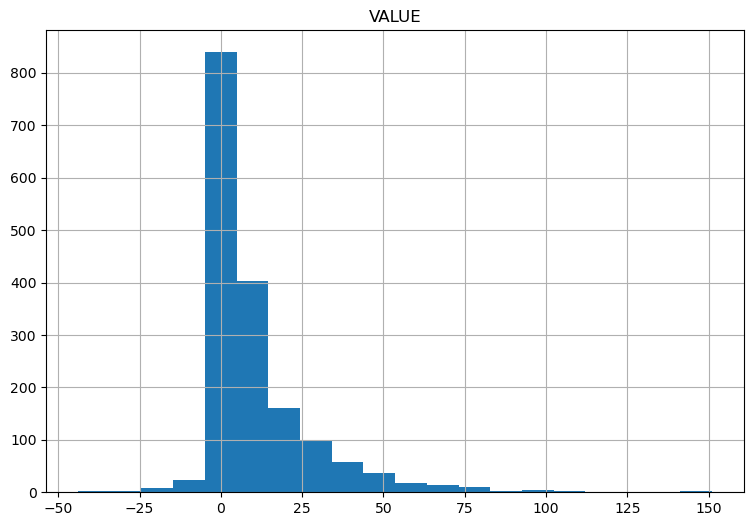

In [22]:
df.hist(column='VALUE',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)  

In [23]:
%matplotlib inline ##needed to make histogram

UsageError: unrecognized arguments: ##needed to make histogram


array([[<Axes: title={'center': 'VALUE'}>]], dtype=object)

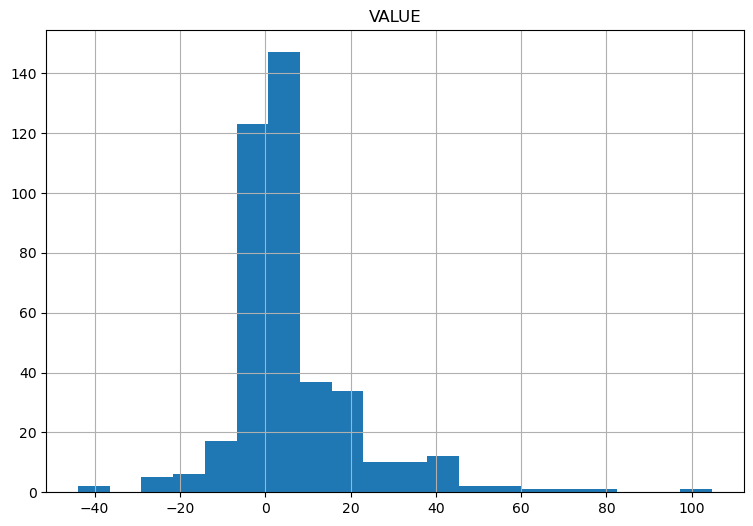

In [24]:
dfnet.hist(column='VALUE',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)  

array([[<Axes: title={'center': 'VALUE'}>]], dtype=object)

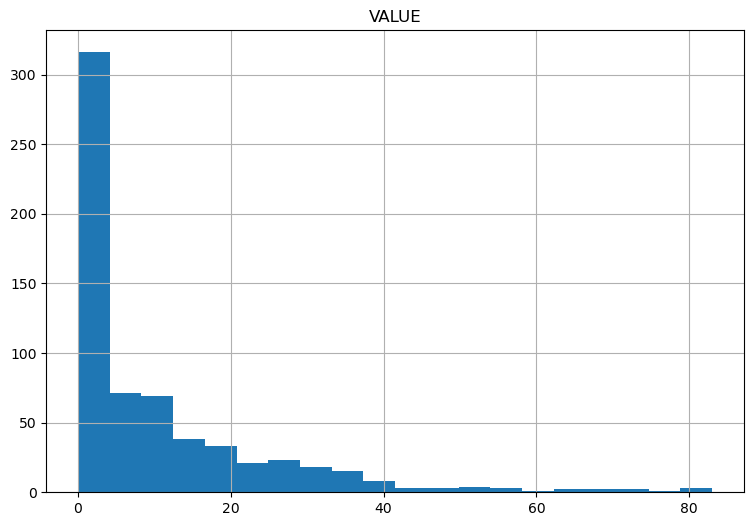

In [25]:
dfem.hist(column='VALUE',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20) 

array([[<Axes: title={'center': 'VALUE'}>]], dtype=object)

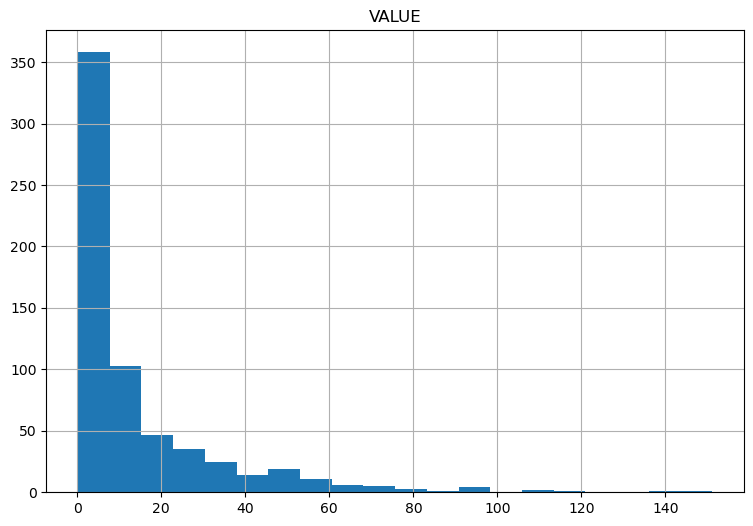

In [26]:
dfim.hist(column='VALUE',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20) 

Age Group
0 - 14 years         [[Axes(0.125,0.11;0.775x0.77)]]
15 - 24 years        [[Axes(0.125,0.11;0.775x0.77)]]
25 - 44 years        [[Axes(0.125,0.11;0.775x0.77)]]
45 - 64 years        [[Axes(0.125,0.11;0.775x0.77)]]
65 years and over    [[Axes(0.125,0.11;0.775x0.77)]]
All ages             [[Axes(0.125,0.11;0.775x0.77)]]
dtype: object

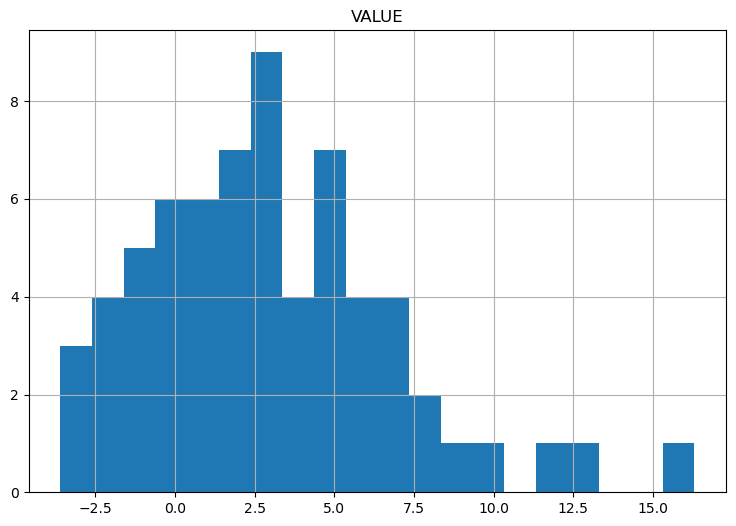

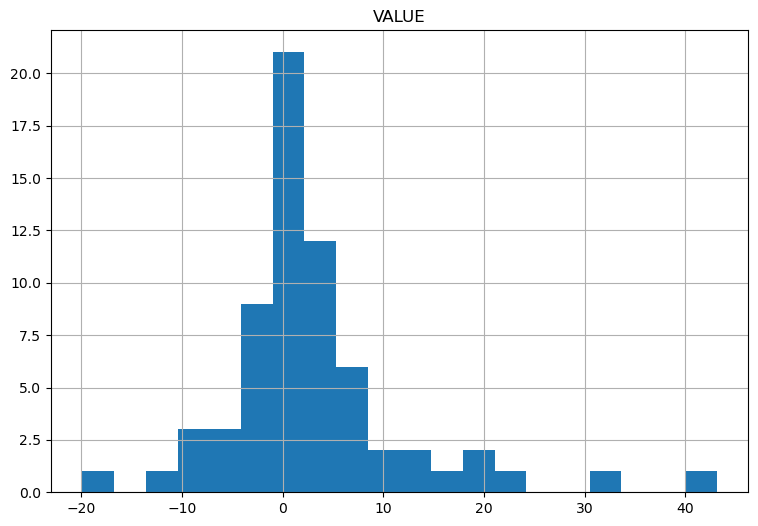

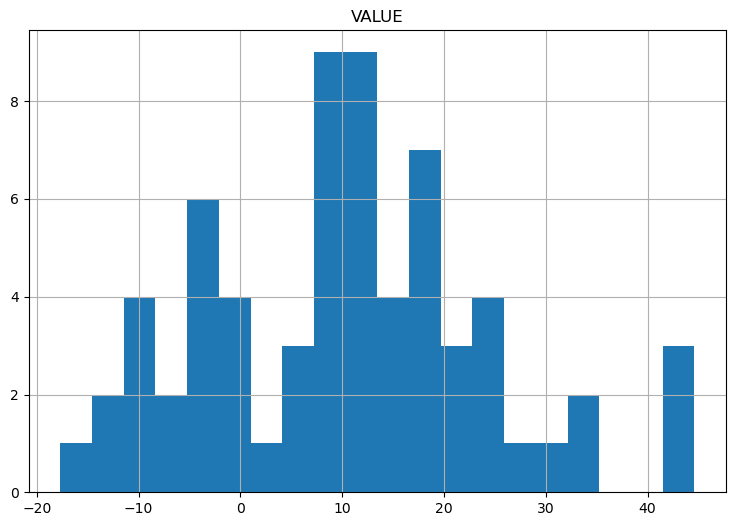

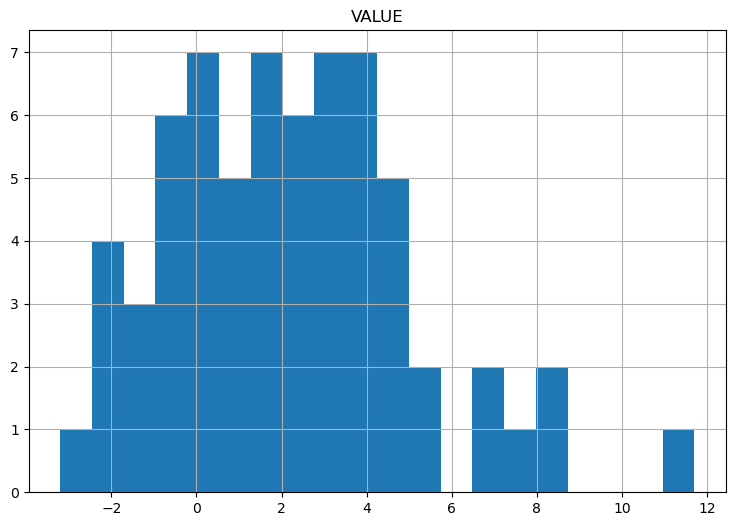

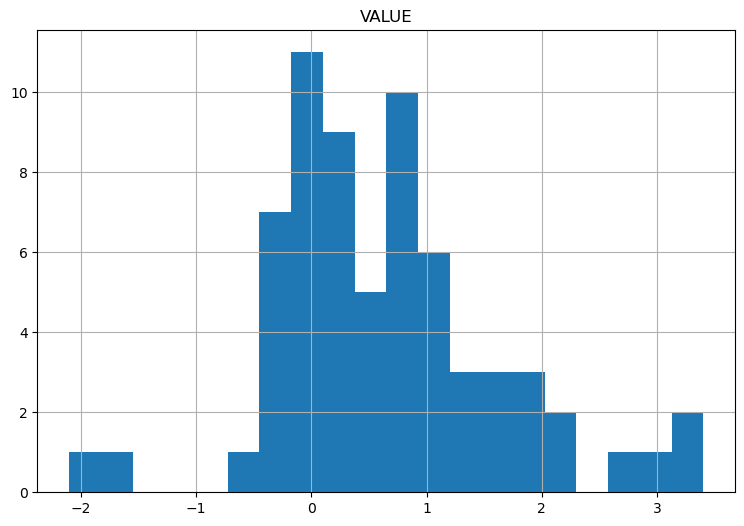

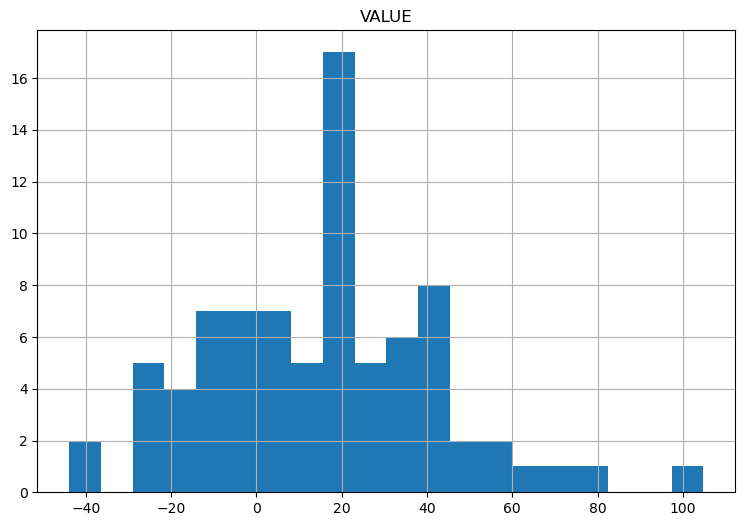

In [27]:
dfnet.groupby(['Age Group']).hist(column='VALUE',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)  

In [28]:

dfnet = df[(df['FlowofPeople'] == "Net migration")]
dfem = df[(df['FlowofPeople'] == "Emigrants: All destinations")]
dfim= df[(df['FlowofPeople'] == "Immigrants: All origins")]

In [29]:
dfnet.groupby(['AgeGroup'])['VALUE'].sum()

AgeGroup
0 - 14 years          193.5
15 - 24 years         205.9
25 - 44 years         690.0
45 - 64 years         145.8
65 years and over      44.5
All ages             1266.4
Name: VALUE, dtype: float64

In [30]:
dfim.groupby(['AgeGroup'])['VALUE'].sum()

AgeGroup
0 - 14 years          585.2
15 - 24 years        1396.2
25 - 44 years        2287.8
45 - 64 years         413.6
65 years and over     156.3
All ages             4283.1
Name: VALUE, dtype: float64

In [31]:
dfem.groupby(['AgeGroup'])['VALUE'].sum()

AgeGroup
0 - 14 years          297.1
15 - 24 years        1591.0
25 - 44 years        1419.0
45 - 64 years         200.9
65 years and over      78.8
All ages             3016.6
Name: VALUE, dtype: float64

In [33]:
%matplotlib inline

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

In [ ]:
df.shape

In [ ]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

# Statistics Part 

You need to analyse the chosen dataset using statistical logic and statistical techniques. Note: ALL Statistical work MUST be carried out using Python.
You are required to:
1.      Summarise your dataset clearly, using relevant descriptive statistics and appropriate plots. These should be carefully motivated and justified, and clearly presented. You should critically analyse your findings, in addition to including the necessary Python code, output and plots in the report. You are required to plot at least three graphs. [0-35]

2.      Use two discrete distributions (Binomial and/or Poisson) in order to explain/identify some information about your dataset. You must explain your reasoning and the techniques you have used. Visualise your data and explain what happens with the large samples in these cases. You must work with Python and your mathematical reasoning must be documented in your report. [0-30]
3.       Use Normal distribution to explain or identify some information about your dataset. [0-20]
4.       Explain the importance of the distributions used in point 3 and 4 in your analysis. Justify the choice of the variables and explain if the variables used for the discrete distributions could be used as normal distribution in this case. [0-15]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df.mean()

In [35]:
df.mean(axis=1)  ###mean of each row

0        982.00
1       1013.60
2       1002.10
10       994.90
11       995.05
         ...   
1993    1011.70
1994    1012.25
1995    1012.40
1996    1011.80
1997    1012.75
Length: 1683, dtype: float64

In [36]:
df.median()    

Year     2008.0
VALUE       4.5
dtype: float64

In [37]:
df.mode()

,Year,AgeGroup,Sex,FlowofPeople,VALUE
0,2002,0 - 14 years,Both sexes,Emigrants: All destinations,0.0
1,2003,15 - 24 years,NaN,Immigrants: All origins,NaN
2,2004,25 - 44 years,NaN,NaN,NaN
3,2005,45 - 64 years,NaN,NaN,NaN
4,2006,65 years and over,NaN,NaN,NaN
5,2007,NaN,NaN,NaN,NaN
6,2008,NaN,NaN,NaN,NaN
7,2009,NaN,NaN,NaN,NaN
8,2010,NaN,NaN,NaN,NaN
9,2011,NaN,NaN,NaN,NaN


In [39]:
five_num = [dfnet["VALUE"].quantile(0),   
           dfnet["VALUE"].quantile(0.25),
            dfnet["VALUE"].quantile(0.50),
           dfnet["VALUE"].quantile(0.75),
          dfnet["VALUE"].quantile(1)]

five_num

[-43.9, -0.15000000000000002, 2.1, 9.3, 104.8]

In [40]:
dfnet["VALUE"].describe()

count    411.000000
mean       6.194891
std       14.904486
min      -43.900000
25%       -0.150000
50%        2.100000
75%        9.300000
max      104.800000
Name: VALUE, dtype: float64

In [41]:
dfnet["VALUE"].quantile(0.75) - dfnet["VALUE"].quantile(0.25)

9.450000000000001

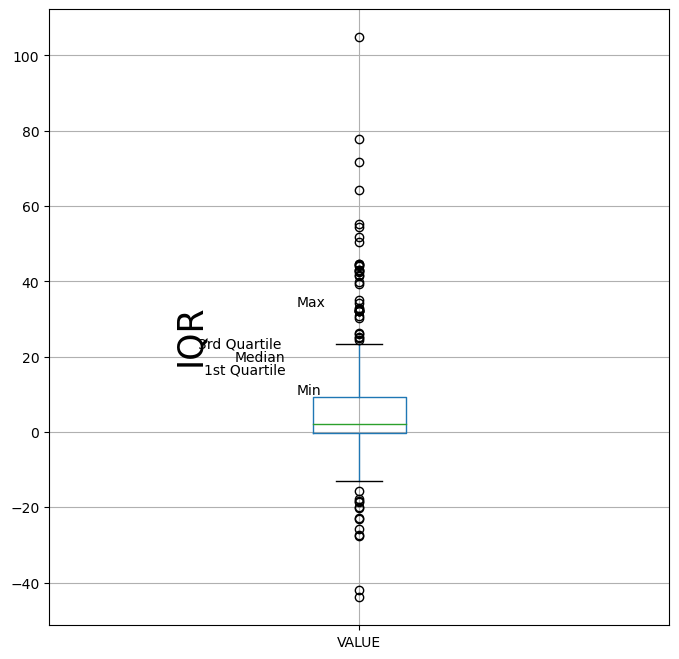

In [42]:
dfnet.boxplot(column="VALUE",
               return_type='axes',
               figsize=(8,8))

plt.text(x=0.74, y=22.25, s="3rd Quartile")
plt.text(x=0.8, y=18.75, s="Median")
plt.text(x=0.75, y=15.5, s="1st Quartile")
plt.text(x=0.9, y=10, s="Min")
plt.text(x=0.9, y=33.5, s="Max")
plt.text(x=0.7, y=19.5, s="IQR", rotation=90, size=25);

In [43]:
dfnet["VALUE"].var()

222.1437055367633

In [44]:
dfnet["VALUE"].std()

14.904486087643656

In [45]:
abs_median_devs = abs(dfnet["VALUE"] - dfnet["VALUE"].median())

abs_median_devs.median() * 1.4826

5.337359999999999

# The Skewness and Kutosis

In [48]:
dfnet["VALUE"].skew()

1.8639471432360062

In [49]:
dfnet["VALUE"].kurt()

7.970935933842057

# Dummy data to investigate skewness and Kutosis

In [56]:
norm_data = np.random.normal(size=100000)
skewed_data = np.concatenate((np.random.normal(size=35000)+2, 
                             np.random.exponential(size=65000)), 
                             axis=0)
uniform_data = np.random.uniform(0,2, size=100000)
peaked_data = np.concatenate((np.random.exponential(size=50000),
                             np.random.exponential(size=50000)*(-1)),
                             axis=0)

data_df = pd.DataFrame({"norm":norm_data,
                       "skewed":skewed_data,
                       "uniform":uniform_data,
                       "peaked":peaked_data})

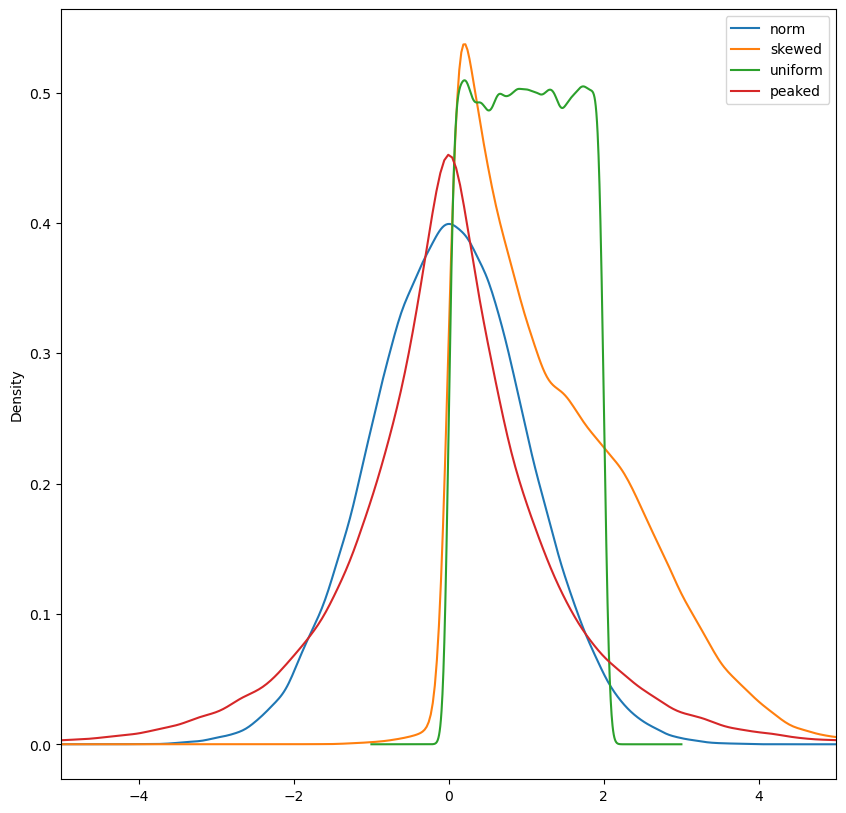

In [57]:
data_df.plot(kind="density",
            figsize=(10,10),
            xlim=(-5,5));

In [58]:
data_df.skew()

norm      -0.001211
skewed     1.024311
uniform   -0.002408
peaked    -0.002370
dtype: float64

In [59]:
data_df.kurt()

norm       0.014336
skewed     1.472182
uniform   -1.201619
peaked     3.126477
dtype: float64

#  Probablility distributions 

In [60]:
import scipy.stats as stats

# Machine learning part

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree

In [ ]:
dummy=pd.get_dummies(df2['VALUE'])

In [ ]:
##split data 

In [ ]:
###The value column is now Binary##
df2.loc[df2['VALUE'] < 1, 'VALUE'] = 0
df2.loc[df2['VALUE'] > 1, 'VALUE'] = 1

In [ ]:
###transform value in d2 to binary to use in tree model

In [ ]:
# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Convert Sex variable to numeric
encoded_sex = label_encoder.fit_transform(df2["Sex"])##this is what will be predicted 

# Initialize model
tree_model = tree.DecisionTreeClassifier()

# Train the model
tree_model.fit(X = pd.DataFrame(encoded_sex), 
               y = df2["VALUE"])

In [ ]:
pip install graphviz

In [ ]:
import graphviz

In [ ]:
dot_data = tree.export_graphviz(tree_model, out_file=None) 
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
# Get Emigration probability
preds = tree_model.predict_proba(X = pd.DataFrame(encoded_sex))

pd.crosstab(preds[:,0], df2["VALUE"])


In [ ]:
df2 = df2.rename(columns={"Age Group": "Age_Group"})

In [ ]:
df2["Age_Group"] = df2["Age_Group"].apply(lambda x: float(x.split()[0].replace('-', 'to')))

In [ ]:
df2['Age_Group'] = df2.Age_Group.astype('category')

In [ ]:
# Make data frame of predictors
predictors = pd.DataFrame([encoded_sex, df2["Age_Group"]]).T

# Train the model
tree_model.fit(X = predictors, 
               y = df2["VALUE"])

In [ ]:
female = preds[df2["Sex"] == "female"][0][1]
male = preds[df2["Sex"]=="male"][0][1]

print(female)
print(male)